In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flicker8k/data/captions.txt
/kaggle/input/flicker8k/data/Images/3226254560_2f8ac147ea.jpg
/kaggle/input/flicker8k/data/Images/214543992_ce6c0d9f9b.jpg
/kaggle/input/flicker8k/data/Images/2366643786_9c9a830db8.jpg
/kaggle/input/flicker8k/data/Images/3368819708_0bfa0808f8.jpg
/kaggle/input/flicker8k/data/Images/2190227737_6e0bde2623.jpg
/kaggle/input/flicker8k/data/Images/2752809449_632cd991b3.jpg
/kaggle/input/flicker8k/data/Images/3097776588_312932e438.jpg
/kaggle/input/flicker8k/data/Images/1206506157_c7956accd5.jpg
/kaggle/input/flicker8k/data/Images/1319634306_816f21677f.jpg
/kaggle/input/flicker8k/data/Images/2465218087_fca77998c6.jpg
/kaggle/input/flicker8k/data/Images/3351493005_6e5030f596.jpg
/kaggle/input/flicker8k/data/Images/2949337912_beba55698b.jpg
/kaggle/input/flicker8k/data/Images/534886684_a6c9f40fa1.jpg
/kaggle/input/flicker8k/data/Images/3543600125_223747ef4c.jpg
/kaggle/input/flicker8k/data/Images/2174206711_11cb712a8d.jpg
/kaggle/input/flicker8k/data/I

In [2]:
path_img="/kaggle/input/flicker8k/data/Images/"
path_cap="/kaggle/input/flicker8k/data/captions.txt"

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.layers import *

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
df=pd.read_csv(path_cap)
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [5]:
import time

i=0
k=1
info={}
img_name=[]
try:
    while True:
        info[df.iloc[i,0]] = ["<start> "+df.iloc[i,1]+" <end>", 
                              "<start> "+df.iloc[i+1,1]+" <end>",
                              "<start> "+df.iloc[i+2,1]+" <end>",
                              "<start> "+df.iloc[i+3,1]+" <end>",
                              "<start> "+df.iloc[i+4,1]+" <end>"]
        img_name.append(df.iloc[i,0])
        i=i+5
        k+=1
        
        if k == 1501:
            break
except:
    print("The data has been processed")

In [6]:
len(info)

1500

In [7]:
len(img_name)

1500

In [8]:
print(img_name[0])
info[img_name[0]]

1000268201_693b08cb0e.jpg


['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>']

In [9]:
import matplotlib.pyplot as plt
from IPython.display import Image,display
from PIL import Image

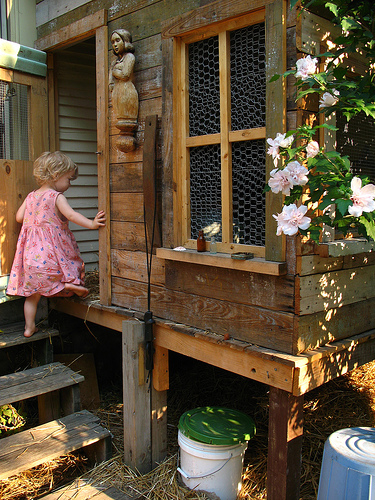

<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>
<start> A girl going into a wooden building . <end>
<start> A little girl climbing into a wooden playhouse . <end>
<start> A little girl climbing the stairs to her playhouse . <end>
<start> A little girl in a pink dress going into a wooden cabin . <end>


In [10]:
k=0
z=Image.open(path_img+img_name[k])
display(z)
try:
    for i in range(5):
        print(info[img_name[k]][i])
except :
    print("Error")
    pass

In [11]:
cap_list=[]
val=0
try:
    while True:
        for i in range(5):
            cap_list.append(info[img_name[val]][i])
        val+=1
except :
    print("Done")

Done


In [12]:
len(cap_list)

7500

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
vocab_size = 18000
embedding_dim = 16
trunc_type='post'
pad_type="post"
oov_tok = "<OOV>"
max_length=40

In [15]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(cap_list)

In [16]:
word_index=tokenizer.word_index
vocab_size=len(word_index)
vocab_size

3896

In [17]:
lengths=[len(t.split()) for t in cap_list]

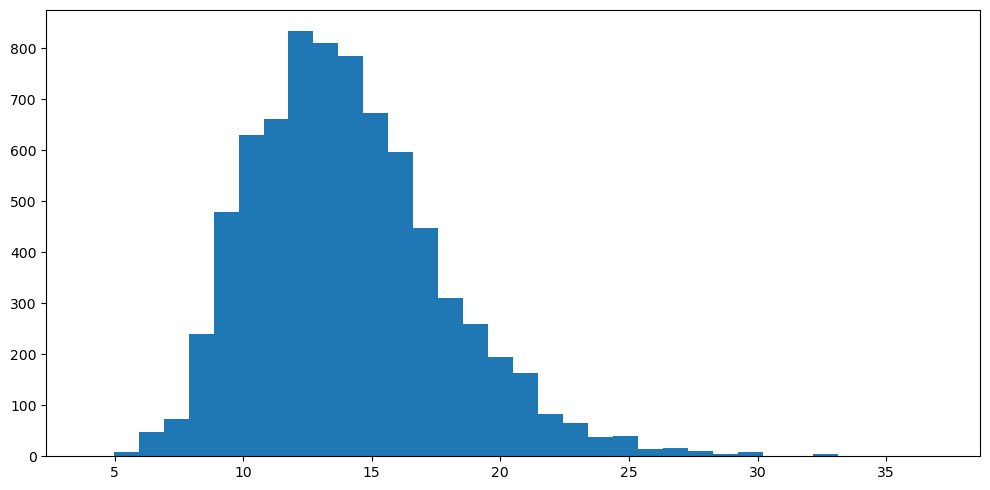

In [18]:
plt.figure(figsize=(10,5))
plt.hist(lengths,bins=len(set(lengths)))
plt.tight_layout()
plt.show()

In [19]:
def get_sequences(tokenizer,cap_list):
    sequences=tokenizer.texts_to_sequences(cap_list)
    #padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type,padding=pad_type)
    return sequences

In [20]:
val=0
padded_cap_seq=[]
try:
    while True:
        padded_cap_seq.append(get_sequences(tokenizer,info[img_name[val]]))
        val+=1
except:
    print("Done")

Done


In [21]:
info[img_name[0]]

['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>']

In [22]:
padded_cap_seq[0]

[[4, 2, 41, 5, 2, 80, 173, 8, 82, 44, 2, 464, 13, 509, 5, 29, 2227, 386, 3],
 [4, 2, 17, 349, 54, 2, 184, 162, 3],
 [4, 2, 33, 17, 82, 54, 2, 184, 1650, 3],
 [4, 2, 33, 17, 82, 6, 509, 19, 60, 1650, 3],
 [4, 2, 33, 17, 5, 2, 80, 173, 349, 54, 2, 184, 1651, 3]]

In [23]:
## Checking of reverse conversion
tokenizer.sequences_to_texts(padded_cap_seq[0])

['start a child in a pink dress is climbing up a set of stairs in an entry way end',
 'start a girl going into a wooden building end',
 'start a little girl climbing into a wooden playhouse end',
 'start a little girl climbing the stairs to her playhouse end',
 'start a little girl in a pink dress going into a wooden cabin end']

In [24]:
## convert the image data to array
def img_generator(img_path):
    
    img_arr=Image.open(img_path)
    img_arr=img_arr.resize((224,224))
    #img_arr=tf.keras.preprocessing.image.img_to_array(img_arr)/255
    return np.expand_dims(img_arr, axis=0)

img_generator(path_img+img_name[0]).shape
img_generator(path_img+img_name[0])

array([[[[ 81,  87,  96],
         [113, 130, 127],
         [119, 140, 133],
         ...,
         [  4,   2,   2],
         [  6,   6,   4],
         [  5,   7,   5]],

        [[ 78,  83,  91],
         [115, 132, 131],
         [123, 145, 139],
         ...,
         [  8,   8,   7],
         [  6,   9,   6],
         [ 13,  22,   6]],

        [[ 76,  77,  91],
         [119, 135, 138],
         [124, 148, 142],
         ...,
         [  8,   9,   5],
         [  7,  13,   6],
         [ 11,  25,   7]],

        ...,

        [[185, 106,  28],
         [140,  67,  22],
         [159, 110,  63],
         ...,
         [220, 228, 241],
         [162, 182, 210],
         [165, 184, 203]],

        [[174,  92,  17],
         [177, 133,  48],
         [228, 178,  77],
         ...,
         [217, 224, 240],
         [164, 181, 206],
         [168, 184, 200]],

        [[211, 129,  49],
         [212, 152,  67],
         [182, 114,  70],
         ...,
         [210, 217, 241],
        

In [25]:
len(img_name)

1500

In [26]:
info_seq={}
i=0
#j=0
try:
    while True:
        info_seq[img_name[i]]=padded_cap_seq[i]
        #print(i)
        i+=1
        #j+=1
except:
    print(f"error : {i}")

error : 1500


In [27]:
print(img_name[0])
padded_cap_seq[0]

1000268201_693b08cb0e.jpg


[[4, 2, 41, 5, 2, 80, 173, 8, 82, 44, 2, 464, 13, 509, 5, 29, 2227, 386, 3],
 [4, 2, 17, 349, 54, 2, 184, 162, 3],
 [4, 2, 33, 17, 82, 54, 2, 184, 1650, 3],
 [4, 2, 33, 17, 82, 6, 509, 19, 60, 1650, 3],
 [4, 2, 33, 17, 5, 2, 80, 173, 349, 54, 2, 184, 1651, 3]]

In [28]:
from tensorflow.keras.applications import InceptionV3
modele = InceptionV3(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
modele.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [29]:
nn_img={}
i=0
from tqdm import tqdm

try:
    for i in tqdm(range(len(img_name))):
        img_arr=img_generator(path_img+img_name[i])
        pred=modele.predict(img_arr).reshape(2048)
        nn_img[img_name[i]]=pred
        
        pass
except:
    print("Done")

  0%|          | 0/1500 [00:00<?, ?it/s]

1/1 [==============================] - 7s 7s/step


  0%|          | 1/1500 [00:07<3:09:15,  7.58s/it]

1/1 [==============================] - 0s 24ms/step


  0%|          | 3/1500 [00:07<50:35,  2.03s/it]  

1/1 [==============================] - 0s 24ms/step


  0%|          | 5/1500 [00:07<25:34,  1.03s/it]

1/1 [==============================] - 0s 25ms/step


  0%|          | 7/1500 [00:08<15:34,  1.60it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 9/1500 [00:08<10:27,  2.38it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 11/1500 [00:08<07:30,  3.31it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 13/1500 [00:08<05:39,  4.38it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 15/1500 [00:08<04:30,  5.50it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 17/1500 [00:08<03:48,  6.49it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 19/1500 [00:09<03:17,  7.49it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 21/1500 [00:09<02:52,  8.55it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 23/1500 [00:09<02:37,  9.40it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 25/1500 [00:09<02:27, 10.03it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 27/1500 [00:09<02:19, 10.57it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 29/1500 [00:09<02:13, 11.00it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 31/1500 [00:10<02:07, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 33/1500 [00:10<02:04, 11.82it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 35/1500 [00:10<02:02, 11.93it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 37/1500 [00:10<02:02, 11.91it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 39/1500 [00:10<02:02, 11.96it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 41/1500 [00:10<01:57, 12.42it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 43/1500 [00:11<01:57, 12.44it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 45/1500 [00:11<01:59, 12.21it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 47/1500 [00:11<01:59, 12.13it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 49/1500 [00:11<01:57, 12.31it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 51/1500 [00:11<01:58, 12.20it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 53/1500 [00:11<01:57, 12.29it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 55/1500 [00:12<02:00, 12.04it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 57/1500 [00:12<01:57, 12.28it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 59/1500 [00:12<01:58, 12.17it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 61/1500 [00:12<01:59, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 63/1500 [00:12<02:00, 11.93it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 65/1500 [00:12<02:00, 11.90it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 67/1500 [00:13<01:57, 12.23it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 69/1500 [00:13<01:57, 12.21it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 71/1500 [00:13<01:53, 12.60it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 73/1500 [00:13<01:55, 12.34it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 75/1500 [00:13<01:56, 12.22it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 77/1500 [00:13<01:57, 12.14it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 79/1500 [00:13<01:56, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 81/1500 [00:14<01:58, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 83/1500 [00:14<01:58, 11.93it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 85/1500 [00:14<02:00, 11.75it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 87/1500 [00:14<01:58, 11.88it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 89/1500 [00:14<01:57, 11.99it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 91/1500 [00:15<02:00, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 93/1500 [00:15<01:58, 11.91it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 95/1500 [00:15<01:56, 12.09it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 97/1500 [00:15<01:56, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 99/1500 [00:15<01:56, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 101/1500 [00:15<01:57, 11.95it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 103/1500 [00:16<01:56, 11.99it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 105/1500 [00:16<01:53, 12.32it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 107/1500 [00:16<01:49, 12.70it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 109/1500 [00:16<01:51, 12.47it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 111/1500 [00:16<01:52, 12.32it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 113/1500 [00:16<01:55, 11.97it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 115/1500 [00:17<02:00, 11.54it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 117/1500 [00:17<02:03, 11.16it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 119/1500 [00:17<02:05, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 121/1500 [00:17<02:07, 10.83it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 123/1500 [00:17<02:06, 10.89it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 125/1500 [00:17<02:04, 11.05it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 127/1500 [00:18<02:05, 10.93it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▊         | 129/1500 [00:18<02:03, 11.07it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▊         | 131/1500 [00:18<02:13, 10.24it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 133/1500 [00:18<02:17,  9.96it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 135/1500 [00:18<02:12, 10.33it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 137/1500 [00:19<02:08, 10.59it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 139/1500 [00:19<02:09, 10.54it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 141/1500 [00:19<02:04, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 143/1500 [00:19<02:01, 11.18it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 145/1500 [00:19<02:01, 11.18it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 147/1500 [00:19<01:57, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 149/1500 [00:20<01:56, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 151/1500 [00:20<01:54, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 153/1500 [00:20<01:58, 11.33it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 155/1500 [00:20<01:59, 11.29it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 157/1500 [00:20<01:58, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 159/1500 [00:21<01:58, 11.27it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 161/1500 [00:21<01:58, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 163/1500 [00:21<02:01, 10.96it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 165/1500 [00:21<02:00, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 167/1500 [00:21<01:58, 11.22it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 169/1500 [00:21<01:57, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 171/1500 [00:22<01:57, 11.28it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 173/1500 [00:22<01:56, 11.41it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 175/1500 [00:22<01:53, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 177/1500 [00:22<01:52, 11.77it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 179/1500 [00:22<01:52, 11.77it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 181/1500 [00:22<01:54, 11.50it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 183/1500 [00:23<01:53, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 185/1500 [00:23<01:53, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 187/1500 [00:23<01:53, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 189/1500 [00:23<01:53, 11.50it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 191/1500 [00:23<01:51, 11.78it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 193/1500 [00:23<01:48, 12.05it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 195/1500 [00:24<01:51, 11.66it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█▎        | 197/1500 [00:24<02:11,  9.93it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 199/1500 [00:24<02:20,  9.25it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 200/1500 [00:24<02:22,  9.10it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 201/1500 [00:24<02:25,  8.95it/s]

1/1 [==============================] - 0s 88ms/step


 13%|█▎        | 202/1500 [00:25<02:39,  8.15it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 203/1500 [00:25<02:44,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▎        | 204/1500 [00:25<02:39,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▎        | 205/1500 [00:25<02:33,  8.41it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▎        | 206/1500 [00:25<02:33,  8.45it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 208/1500 [00:25<02:14,  9.61it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 210/1500 [00:25<02:05, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 212/1500 [00:26<01:58, 10.86it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 214/1500 [00:26<01:53, 11.34it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 216/1500 [00:26<01:53, 11.36it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 218/1500 [00:26<01:51, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 220/1500 [00:26<01:50, 11.56it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 222/1500 [00:26<01:49, 11.62it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 224/1500 [00:27<01:50, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 226/1500 [00:27<01:51, 11.47it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 228/1500 [00:27<01:48, 11.75it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 230/1500 [00:27<01:45, 12.03it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 232/1500 [00:27<01:45, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 234/1500 [00:27<01:47, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 236/1500 [00:28<01:47, 11.73it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 238/1500 [00:28<01:51, 11.30it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 240/1500 [00:28<01:47, 11.75it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 242/1500 [00:28<01:46, 11.77it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 244/1500 [00:28<01:48, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 246/1500 [00:28<01:46, 11.74it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 248/1500 [00:29<01:44, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 250/1500 [00:29<01:46, 11.69it/s]

1/1 [==============================] - 0s 62ms/step


 17%|█▋        | 252/1500 [00:29<01:58, 10.53it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 254/1500 [00:29<02:04, 10.00it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 256/1500 [00:29<01:58, 10.50it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 258/1500 [00:30<01:53, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 260/1500 [00:30<01:49, 11.33it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 262/1500 [00:30<01:50, 11.25it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 264/1500 [00:30<01:51, 11.13it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 266/1500 [00:30<01:50, 11.20it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 268/1500 [00:30<01:49, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 270/1500 [00:31<01:48, 11.32it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 272/1500 [00:31<01:47, 11.39it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 274/1500 [00:31<01:45, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 276/1500 [00:31<01:45, 11.64it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 278/1500 [00:31<01:44, 11.70it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 280/1500 [00:31<01:46, 11.46it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 282/1500 [00:32<01:44, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 284/1500 [00:32<01:44, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 286/1500 [00:32<01:52, 10.80it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 288/1500 [00:32<01:51, 10.89it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 290/1500 [00:32<01:49, 11.01it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 292/1500 [00:33<01:48, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 294/1500 [00:33<01:45, 11.45it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 296/1500 [00:33<01:43, 11.61it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 298/1500 [00:33<01:43, 11.56it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 300/1500 [00:33<01:42, 11.75it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 302/1500 [00:33<01:41, 11.82it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 304/1500 [00:34<01:38, 12.11it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 306/1500 [00:34<01:40, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 308/1500 [00:34<01:40, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 310/1500 [00:34<01:41, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 312/1500 [00:34<01:41, 11.66it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 314/1500 [00:34<01:41, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 316/1500 [00:35<01:41, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 318/1500 [00:35<01:40, 11.76it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 320/1500 [00:35<01:41, 11.64it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 322/1500 [00:35<01:38, 11.96it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 324/1500 [00:35<01:38, 11.97it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 326/1500 [00:35<01:37, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 328/1500 [00:36<01:37, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 330/1500 [00:36<01:38, 11.94it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 332/1500 [00:36<01:36, 12.07it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 334/1500 [00:36<01:38, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 336/1500 [00:36<01:37, 11.93it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 338/1500 [00:36<01:35, 12.16it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 340/1500 [00:37<01:34, 12.29it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 342/1500 [00:37<01:36, 12.02it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 344/1500 [00:37<01:33, 12.31it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 346/1500 [00:37<01:34, 12.26it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 348/1500 [00:37<01:35, 12.11it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 350/1500 [00:37<01:34, 12.16it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 352/1500 [00:38<01:37, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 354/1500 [00:38<01:38, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 356/1500 [00:38<01:38, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 358/1500 [00:38<01:38, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 360/1500 [00:38<01:38, 11.55it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 362/1500 [00:38<01:38, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 364/1500 [00:39<01:35, 11.84it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 366/1500 [00:39<01:36, 11.75it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 368/1500 [00:39<01:36, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 370/1500 [00:39<01:37, 11.60it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 372/1500 [00:39<01:36, 11.63it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 374/1500 [00:39<01:36, 11.68it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 376/1500 [00:40<01:36, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 378/1500 [00:40<01:38, 11.43it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 380/1500 [00:40<01:45, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 382/1500 [00:40<01:45, 10.63it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 384/1500 [00:40<01:40, 11.06it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 386/1500 [00:41<01:38, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 388/1500 [00:41<01:36, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 390/1500 [00:41<01:35, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 392/1500 [00:41<01:36, 11.53it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 394/1500 [00:41<01:33, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 396/1500 [00:41<01:34, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 398/1500 [00:42<01:34, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 400/1500 [00:42<01:34, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 402/1500 [00:42<01:34, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 404/1500 [00:42<01:34, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 406/1500 [00:42<01:35, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 408/1500 [00:42<01:33, 11.70it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 410/1500 [00:43<01:32, 11.78it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 412/1500 [00:43<01:32, 11.75it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 414/1500 [00:43<01:34, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 416/1500 [00:43<01:32, 11.71it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 418/1500 [00:43<01:31, 11.79it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 420/1500 [00:43<01:31, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 422/1500 [00:44<01:29, 12.03it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 424/1500 [00:44<01:29, 12.01it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 426/1500 [00:44<01:29, 12.05it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 428/1500 [00:44<01:26, 12.39it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 430/1500 [00:44<01:27, 12.21it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 432/1500 [00:44<01:30, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 434/1500 [00:45<01:29, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 436/1500 [00:45<01:32, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 438/1500 [00:45<01:32, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 440/1500 [00:45<01:30, 11.69it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 442/1500 [00:45<01:31, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 444/1500 [00:46<01:32, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 446/1500 [00:46<01:31, 11.47it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 448/1500 [00:46<01:30, 11.63it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 450/1500 [00:46<01:31, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 452/1500 [00:46<01:34, 11.14it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 454/1500 [00:46<01:32, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 456/1500 [00:47<01:31, 11.40it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 458/1500 [00:47<01:30, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 460/1500 [00:47<01:34, 11.03it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 462/1500 [00:47<01:32, 11.22it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 464/1500 [00:47<01:31, 11.32it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 466/1500 [00:47<01:30, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 468/1500 [00:48<01:29, 11.53it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 470/1500 [00:48<01:27, 11.75it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 472/1500 [00:48<01:25, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 474/1500 [00:48<01:25, 11.99it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 476/1500 [00:48<01:26, 11.81it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 478/1500 [00:48<01:28, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 480/1500 [00:49<01:26, 11.83it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 482/1500 [00:49<01:26, 11.81it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 484/1500 [00:49<01:30, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 486/1500 [00:49<01:30, 11.26it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 488/1500 [00:49<01:28, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 490/1500 [00:50<01:27, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 492/1500 [00:50<01:27, 11.58it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 494/1500 [00:50<01:26, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 496/1500 [00:50<01:26, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 498/1500 [00:50<01:25, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 500/1500 [00:50<01:26, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 502/1500 [00:51<01:24, 11.75it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▎      | 504/1500 [00:51<01:25, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 506/1500 [00:51<01:25, 11.56it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 508/1500 [00:51<01:36, 10.30it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 510/1500 [00:51<01:30, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 512/1500 [00:51<01:27, 11.32it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 514/1500 [00:52<01:26, 11.43it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 516/1500 [00:52<01:25, 11.47it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 518/1500 [00:52<01:24, 11.66it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 520/1500 [00:52<01:24, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 522/1500 [00:52<01:25, 11.40it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 524/1500 [00:52<01:22, 11.82it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 526/1500 [00:53<01:21, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 528/1500 [00:53<01:20, 12.10it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 530/1500 [00:53<01:20, 12.07it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 532/1500 [00:53<01:22, 11.80it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 534/1500 [00:53<01:21, 11.90it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 536/1500 [00:53<01:20, 12.04it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 538/1500 [00:54<01:19, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 540/1500 [00:54<01:20, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 542/1500 [00:54<01:21, 11.77it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 544/1500 [00:54<01:21, 11.74it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 546/1500 [00:54<01:21, 11.77it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 548/1500 [00:54<01:20, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 550/1500 [00:55<01:22, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 552/1500 [00:55<01:22, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 554/1500 [00:55<01:21, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 556/1500 [00:55<01:21, 11.60it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 558/1500 [00:55<01:28, 10.59it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 560/1500 [00:56<01:35,  9.79it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 562/1500 [00:56<01:40,  9.34it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 563/1500 [00:56<01:49,  8.58it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 564/1500 [00:56<01:48,  8.60it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 565/1500 [00:56<01:49,  8.56it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 566/1500 [00:56<01:49,  8.54it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 567/1500 [00:57<01:52,  8.27it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 568/1500 [00:57<01:52,  8.28it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 570/1500 [00:57<01:36,  9.64it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 572/1500 [00:57<01:29, 10.42it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 574/1500 [00:57<01:26, 10.69it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 576/1500 [00:57<01:23, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▊      | 578/1500 [00:58<01:22, 11.20it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 580/1500 [00:58<01:21, 11.30it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 582/1500 [00:58<01:21, 11.28it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 584/1500 [00:58<01:20, 11.41it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 586/1500 [00:58<01:20, 11.32it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 588/1500 [00:58<01:19, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 590/1500 [00:59<01:20, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 592/1500 [00:59<01:18, 11.62it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 594/1500 [00:59<01:19, 11.46it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 596/1500 [00:59<02:00,  7.50it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 598/1500 [01:00<01:47,  8.39it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 600/1500 [01:00<01:40,  8.96it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 602/1500 [01:00<01:35,  9.37it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 604/1500 [01:00<01:31,  9.77it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 606/1500 [01:00<01:28, 10.07it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 608/1500 [01:00<01:26, 10.26it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 610/1500 [01:01<01:25, 10.45it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 612/1500 [01:01<01:23, 10.63it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 614/1500 [01:01<01:23, 10.60it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 616/1500 [01:01<01:22, 10.75it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 618/1500 [01:01<01:19, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 620/1500 [01:02<01:15, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 622/1500 [01:02<01:17, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 624/1500 [01:02<01:16, 11.46it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 626/1500 [01:02<01:26, 10.10it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 628/1500 [01:02<01:24, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 630/1500 [01:03<01:24, 10.35it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 632/1500 [01:03<01:24, 10.30it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 634/1500 [01:03<01:21, 10.57it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 636/1500 [01:03<01:19, 10.81it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 638/1500 [01:03<01:19, 10.79it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 640/1500 [01:03<01:19, 10.81it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 642/1500 [01:04<01:19, 10.84it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 644/1500 [01:04<01:18, 10.95it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 646/1500 [01:04<01:16, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 648/1500 [01:04<01:15, 11.23it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 650/1500 [01:04<01:16, 11.15it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 652/1500 [01:05<01:14, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 654/1500 [01:05<01:13, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 656/1500 [01:05<01:12, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 658/1500 [01:05<01:13, 11.46it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 660/1500 [01:05<01:11, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 662/1500 [01:05<01:12, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 664/1500 [01:06<01:10, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 666/1500 [01:06<01:11, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 668/1500 [01:06<01:12, 11.47it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 670/1500 [01:06<01:12, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 672/1500 [01:06<01:12, 11.47it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 674/1500 [01:06<01:10, 11.72it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 676/1500 [01:07<01:10, 11.68it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 678/1500 [01:07<01:10, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 680/1500 [01:07<01:11, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 682/1500 [01:07<01:11, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 684/1500 [01:07<01:10, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 686/1500 [01:07<01:11, 11.42it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 688/1500 [01:08<01:10, 11.48it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 690/1500 [01:08<01:10, 11.57it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 692/1500 [01:08<01:07, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 694/1500 [01:08<01:09, 11.52it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 696/1500 [01:08<01:10, 11.34it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 698/1500 [01:08<01:10, 11.34it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 700/1500 [01:09<01:10, 11.36it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 702/1500 [01:09<01:10, 11.34it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 704/1500 [01:09<01:11, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 706/1500 [01:09<01:09, 11.45it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 708/1500 [01:09<01:07, 11.74it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 710/1500 [01:10<01:06, 11.87it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 712/1500 [01:10<01:07, 11.71it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 714/1500 [01:10<01:06, 11.74it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 716/1500 [01:10<01:04, 12.21it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 718/1500 [01:10<01:03, 12.24it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 720/1500 [01:10<01:04, 12.04it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 722/1500 [01:11<01:05, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 724/1500 [01:11<01:04, 12.09it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 726/1500 [01:11<01:05, 11.91it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▊     | 728/1500 [01:11<01:04, 12.02it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 730/1500 [01:11<01:05, 11.70it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 732/1500 [01:11<01:04, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 734/1500 [01:12<01:04, 11.90it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 736/1500 [01:12<01:05, 11.69it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 738/1500 [01:12<01:03, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 740/1500 [01:12<01:04, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 742/1500 [01:12<01:04, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 744/1500 [01:12<01:03, 11.85it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 746/1500 [01:13<01:01, 12.30it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 748/1500 [01:13<01:02, 12.03it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 750/1500 [01:13<01:02, 11.93it/s]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 752/1500 [01:13<01:10, 10.68it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 754/1500 [01:13<01:07, 11.10it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 756/1500 [01:13<01:04, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 758/1500 [01:14<01:05, 11.37it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 760/1500 [01:14<01:04, 11.52it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 762/1500 [01:14<01:03, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 764/1500 [01:14<01:03, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 766/1500 [01:14<01:04, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 768/1500 [01:14<01:02, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 770/1500 [01:15<01:03, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 772/1500 [01:15<01:02, 11.61it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 774/1500 [01:15<01:00, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 776/1500 [01:15<01:02, 11.64it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 778/1500 [01:15<01:01, 11.68it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 780/1500 [01:15<00:59, 12.04it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 782/1500 [01:16<00:59, 12.14it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 784/1500 [01:16<00:59, 12.13it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 786/1500 [01:16<00:58, 12.21it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 788/1500 [01:16<00:58, 12.07it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 790/1500 [01:16<00:58, 12.04it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 792/1500 [01:16<00:59, 11.93it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 794/1500 [01:17<01:01, 11.49it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 796/1500 [01:17<01:00, 11.59it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 798/1500 [01:17<00:59, 11.84it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 800/1500 [01:17<00:56, 12.31it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 802/1500 [01:17<00:56, 12.33it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 804/1500 [01:17<00:56, 12.42it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 806/1500 [01:18<00:55, 12.58it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 808/1500 [01:18<00:54, 12.71it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 810/1500 [01:18<00:54, 12.76it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 812/1500 [01:18<00:55, 12.45it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 814/1500 [01:18<00:56, 12.25it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 816/1500 [01:18<00:57, 11.99it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 818/1500 [01:19<00:57, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 820/1500 [01:19<00:56, 11.97it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 822/1500 [01:19<01:00, 11.22it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 824/1500 [01:19<00:57, 11.68it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 826/1500 [01:19<00:56, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 828/1500 [01:19<00:55, 12.19it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 830/1500 [01:20<00:55, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 832/1500 [01:20<00:56, 11.87it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 834/1500 [01:20<00:55, 12.07it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 836/1500 [01:20<00:55, 11.97it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 838/1500 [01:20<00:55, 12.00it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 840/1500 [01:20<00:52, 12.48it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 842/1500 [01:21<00:53, 12.39it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 844/1500 [01:21<00:51, 12.72it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 846/1500 [01:21<00:52, 12.55it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 848/1500 [01:21<00:53, 12.23it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 850/1500 [01:21<00:52, 12.41it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 852/1500 [01:21<00:51, 12.49it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 854/1500 [01:22<00:54, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 856/1500 [01:22<00:53, 12.01it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 858/1500 [01:22<00:53, 12.06it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 860/1500 [01:22<00:53, 12.07it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 862/1500 [01:22<00:53, 12.01it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 864/1500 [01:22<00:51, 12.38it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 866/1500 [01:23<00:52, 12.05it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 868/1500 [01:23<00:52, 11.99it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 870/1500 [01:23<00:50, 12.39it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 872/1500 [01:23<00:51, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 874/1500 [01:23<00:52, 11.91it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 876/1500 [01:23<00:52, 11.94it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 878/1500 [01:24<00:51, 12.08it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 880/1500 [01:24<00:51, 12.07it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 882/1500 [01:24<00:51, 12.11it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 884/1500 [01:24<00:59, 10.28it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 886/1500 [01:24<00:56, 10.78it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 888/1500 [01:24<00:53, 11.37it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 890/1500 [01:25<00:51, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 892/1500 [01:25<00:51, 11.73it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 894/1500 [01:25<00:51, 11.72it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 896/1500 [01:25<00:51, 11.80it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 898/1500 [01:25<00:50, 11.90it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 900/1500 [01:25<00:51, 11.57it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 902/1500 [01:26<00:51, 11.57it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 904/1500 [01:26<00:51, 11.60it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 906/1500 [01:26<00:49, 11.91it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 908/1500 [01:26<00:49, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 910/1500 [01:26<00:49, 11.96it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 912/1500 [01:26<00:48, 12.06it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 914/1500 [01:27<00:50, 11.62it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 916/1500 [01:27<00:49, 11.80it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 918/1500 [01:27<00:54, 10.69it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████▏   | 920/1500 [01:27<01:02,  9.30it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████▏   | 921/1500 [01:27<01:04,  9.00it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████▏   | 922/1500 [01:28<01:04,  8.93it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 923/1500 [01:28<01:04,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 924/1500 [01:28<01:04,  8.93it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 925/1500 [01:28<01:10,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 926/1500 [01:28<01:09,  8.27it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 927/1500 [01:28<01:13,  7.76it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 928/1500 [01:28<01:09,  8.23it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 930/1500 [01:28<00:59,  9.54it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 932/1500 [01:29<00:55, 10.16it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 934/1500 [01:29<00:52, 10.78it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 936/1500 [01:29<00:51, 11.04it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 938/1500 [01:29<00:49, 11.36it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 940/1500 [01:29<00:48, 11.60it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 942/1500 [01:29<00:46, 11.90it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 944/1500 [01:30<00:46, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 946/1500 [01:30<00:46, 11.86it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 948/1500 [01:30<00:46, 11.82it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 950/1500 [01:30<00:45, 11.98it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 952/1500 [01:30<00:45, 12.05it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 954/1500 [01:30<00:44, 12.14it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 956/1500 [01:31<00:46, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 958/1500 [01:31<00:47, 11.42it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 960/1500 [01:31<00:45, 11.87it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 962/1500 [01:31<00:44, 12.02it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 964/1500 [01:31<00:44, 12.08it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 966/1500 [01:31<00:43, 12.19it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 968/1500 [01:32<00:43, 12.16it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 970/1500 [01:32<00:43, 12.25it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 972/1500 [01:32<00:43, 12.18it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 974/1500 [01:32<00:43, 11.98it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 976/1500 [01:32<00:43, 11.94it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 978/1500 [01:32<00:42, 12.37it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 980/1500 [01:33<00:41, 12.47it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 982/1500 [01:33<00:42, 12.24it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 984/1500 [01:33<00:43, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 986/1500 [01:33<00:42, 12.05it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 988/1500 [01:33<00:42, 12.04it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 990/1500 [01:33<00:42, 11.95it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 992/1500 [01:34<00:42, 11.89it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 994/1500 [01:34<00:42, 11.96it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 996/1500 [01:34<00:42, 11.90it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 998/1500 [01:34<00:42, 11.88it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 1000/1500 [01:34<00:42, 11.89it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 1002/1500 [01:34<00:40, 12.19it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 1004/1500 [01:35<00:39, 12.64it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 1006/1500 [01:35<00:39, 12.52it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 1008/1500 [01:35<00:43, 11.36it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 1010/1500 [01:35<00:45, 10.78it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 1012/1500 [01:35<00:43, 11.24it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1014/1500 [01:36<00:44, 10.99it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1016/1500 [01:36<00:42, 11.43it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 1018/1500 [01:36<00:41, 11.54it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1020/1500 [01:36<00:40, 11.75it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 1022/1500 [01:36<00:39, 12.09it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1024/1500 [01:36<00:38, 12.47it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 1026/1500 [01:37<00:38, 12.32it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 1028/1500 [01:37<00:38, 12.19it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 1030/1500 [01:37<00:38, 12.18it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 1032/1500 [01:37<00:37, 12.34it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 1034/1500 [01:37<00:38, 12.12it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 1036/1500 [01:37<00:38, 11.90it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 1038/1500 [01:38<00:38, 11.88it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 1040/1500 [01:38<00:37, 12.13it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 1042/1500 [01:38<00:38, 12.02it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 1044/1500 [01:38<00:37, 12.15it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 1046/1500 [01:38<00:37, 12.01it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 1048/1500 [01:38<00:36, 12.38it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 1050/1500 [01:38<00:36, 12.34it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 1052/1500 [01:39<00:36, 12.31it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 1054/1500 [01:39<00:37, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 1056/1500 [01:39<00:37, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 1058/1500 [01:39<00:37, 11.84it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 1060/1500 [01:39<00:37, 11.79it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 1062/1500 [01:40<00:37, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 1064/1500 [01:40<00:36, 12.06it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 1066/1500 [01:40<00:36, 12.01it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 1068/1500 [01:40<00:35, 12.19it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 1070/1500 [01:40<00:35, 12.07it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 1072/1500 [01:40<00:35, 12.12it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1074/1500 [01:40<00:34, 12.42it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 1076/1500 [01:41<00:34, 12.42it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1078/1500 [01:41<00:34, 12.20it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1080/1500 [01:41<00:34, 12.26it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1082/1500 [01:41<00:34, 12.16it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 1084/1500 [01:41<00:33, 12.55it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 1086/1500 [01:41<00:33, 12.39it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 1088/1500 [01:42<00:32, 12.55it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 1090/1500 [01:42<00:33, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1092/1500 [01:42<00:33, 12.07it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 1094/1500 [01:42<00:33, 12.03it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1096/1500 [01:42<00:33, 11.96it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 1098/1500 [01:42<00:34, 11.73it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1100/1500 [01:43<00:34, 11.54it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 1102/1500 [01:43<00:34, 11.66it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 1104/1500 [01:43<00:33, 11.96it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 1106/1500 [01:43<00:31, 12.43it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 1108/1500 [01:43<00:31, 12.44it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 1110/1500 [01:43<00:31, 12.36it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 1112/1500 [01:44<00:31, 12.32it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 1114/1500 [01:44<00:31, 12.21it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 1116/1500 [01:44<00:31, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 1118/1500 [01:44<00:31, 12.01it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 1120/1500 [01:44<00:31, 11.95it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 1122/1500 [01:44<00:31, 12.01it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 1124/1500 [01:45<00:30, 12.22it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 1126/1500 [01:45<00:30, 12.37it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 1128/1500 [01:45<00:29, 12.50it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 1130/1500 [01:45<00:29, 12.50it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 1132/1500 [01:45<00:28, 12.73it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 1134/1500 [01:45<00:29, 12.48it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 1136/1500 [01:46<00:29, 12.14it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 1138/1500 [01:46<00:30, 11.71it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 1140/1500 [01:46<00:29, 12.04it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 1142/1500 [01:46<00:34, 10.43it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 1144/1500 [01:46<00:32, 10.91it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 1146/1500 [01:46<00:31, 11.25it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 1148/1500 [01:47<00:29, 11.92it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 1150/1500 [01:47<00:29, 11.98it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 1152/1500 [01:47<00:28, 12.03it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 1154/1500 [01:47<00:28, 11.94it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 1156/1500 [01:47<00:29, 11.77it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 1158/1500 [01:47<00:28, 12.02it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 1160/1500 [01:48<00:28, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 1162/1500 [01:48<00:29, 11.56it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 1164/1500 [01:48<00:28, 11.74it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 1166/1500 [01:48<00:28, 11.90it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 1168/1500 [01:48<00:27, 11.97it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 1170/1500 [01:48<00:27, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 1172/1500 [01:49<00:27, 12.04it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 1174/1500 [01:49<00:28, 11.55it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 1176/1500 [01:49<00:29, 11.05it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 1178/1500 [01:49<00:28, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 1180/1500 [01:49<00:28, 11.26it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 1182/1500 [01:50<00:27, 11.62it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 1184/1500 [01:50<00:26, 11.90it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 1186/1500 [01:50<00:26, 11.95it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 1188/1500 [01:50<00:25, 12.16it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 1190/1500 [01:50<00:26, 11.91it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 1192/1500 [01:50<00:25, 12.12it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 1194/1500 [01:51<00:24, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 1196/1500 [01:51<00:24, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 1198/1500 [01:51<00:25, 11.83it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 1200/1500 [01:51<00:25, 11.78it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 1202/1500 [01:51<00:26, 11.33it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 1204/1500 [01:51<00:25, 11.48it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 1206/1500 [01:52<00:24, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 1208/1500 [01:52<00:25, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 1210/1500 [01:52<00:24, 11.65it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 1212/1500 [01:52<00:24, 11.95it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 1214/1500 [01:52<00:23, 11.98it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 1216/1500 [01:52<00:23, 11.90it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 1218/1500 [01:53<00:23, 11.92it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 1220/1500 [01:53<00:23, 12.04it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 1222/1500 [01:53<00:22, 12.17it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 1224/1500 [01:53<00:22, 12.29it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 1226/1500 [01:53<00:22, 12.12it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 1228/1500 [01:53<00:22, 12.17it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 1230/1500 [01:54<00:22, 12.07it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 1232/1500 [01:54<00:21, 12.47it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 1234/1500 [01:54<00:21, 12.48it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 1236/1500 [01:54<00:20, 12.58it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 1238/1500 [01:54<00:20, 12.64it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 1240/1500 [01:54<00:21, 12.08it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 1242/1500 [01:55<00:20, 12.44it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 1244/1500 [01:55<00:21, 12.16it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 1246/1500 [01:55<00:20, 12.28it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 1248/1500 [01:55<00:20, 12.24it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 1250/1500 [01:55<00:20, 12.08it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 1252/1500 [01:55<00:21, 11.77it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 1254/1500 [01:56<00:20, 12.01it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 1256/1500 [01:56<00:19, 12.25it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 1258/1500 [01:56<00:19, 12.45it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 1260/1500 [01:56<00:19, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 1262/1500 [01:56<00:19, 11.98it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 1264/1500 [01:56<00:19, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 1266/1500 [01:56<00:19, 11.97it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 1268/1500 [01:57<00:19, 11.94it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 1270/1500 [01:57<00:20, 11.46it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 1272/1500 [01:57<00:22,  9.92it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 1274/1500 [01:57<00:21, 10.42it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 1276/1500 [01:57<00:20, 10.93it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 1278/1500 [01:58<00:19, 11.41it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 1280/1500 [01:58<00:19, 11.49it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 1282/1500 [01:58<00:18, 11.71it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 1284/1500 [01:58<00:18, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 1286/1500 [01:58<00:17, 12.15it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 1288/1500 [01:58<00:17, 12.00it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 1290/1500 [01:59<00:22,  9.48it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 1292/1500 [01:59<00:24,  8.44it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 1293/1500 [01:59<00:24,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▋ | 1294/1500 [01:59<00:24,  8.55it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▋ | 1295/1500 [01:59<00:23,  8.62it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▋ | 1296/1500 [02:00<00:25,  7.97it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▋ | 1297/1500 [02:00<00:25,  8.02it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 1298/1500 [02:00<00:24,  8.37it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 1300/1500 [02:00<00:21,  9.14it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1302/1500 [02:00<00:19, 10.16it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1304/1500 [02:00<00:17, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1306/1500 [02:00<00:17, 11.23it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 1308/1500 [02:01<00:16, 11.46it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 1310/1500 [02:01<00:16, 11.74it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1312/1500 [02:01<00:15, 11.77it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 1314/1500 [02:01<00:15, 11.85it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1316/1500 [02:01<00:15, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 1318/1500 [02:01<00:15, 11.47it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 1320/1500 [02:02<00:15, 11.55it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 1322/1500 [02:02<00:15, 11.28it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 1324/1500 [02:02<00:15, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 1326/1500 [02:02<00:15, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 1328/1500 [02:02<00:15, 11.14it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▊ | 1330/1500 [02:03<00:14, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 1332/1500 [02:03<00:14, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 1334/1500 [02:03<00:14, 11.07it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 1336/1500 [02:03<00:14, 11.24it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 1338/1500 [02:03<00:13, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 1340/1500 [02:03<00:13, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 1342/1500 [02:04<00:13, 11.56it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 1344/1500 [02:04<00:13, 11.61it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 1346/1500 [02:04<00:12, 12.03it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 1348/1500 [02:04<00:12, 12.32it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 1350/1500 [02:04<00:11, 12.56it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 1352/1500 [02:04<00:11, 12.53it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 1354/1500 [02:05<00:11, 12.26it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 1356/1500 [02:05<00:11, 12.15it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 1358/1500 [02:05<00:11, 12.13it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 1360/1500 [02:05<00:11, 11.83it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 1362/1500 [02:05<00:11, 11.79it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 1364/1500 [02:05<00:11, 11.83it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 1366/1500 [02:06<00:11, 11.89it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 1368/1500 [02:06<00:11, 11.98it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 1370/1500 [02:06<00:10, 12.11it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 1372/1500 [02:06<00:10, 11.69it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 1374/1500 [02:06<00:10, 11.93it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 1376/1500 [02:06<00:10, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 1378/1500 [02:07<00:10, 11.71it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 1380/1500 [02:07<00:10, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 1382/1500 [02:07<00:09, 11.86it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 1384/1500 [02:07<00:09, 11.84it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 1386/1500 [02:07<00:09, 11.98it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 1388/1500 [02:07<00:09, 12.12it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 1390/1500 [02:08<00:09, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 1392/1500 [02:08<00:08, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 1394/1500 [02:08<00:08, 12.37it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 1396/1500 [02:08<00:09, 10.47it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 1398/1500 [02:08<00:09, 10.69it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 1400/1500 [02:08<00:08, 11.34it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 1402/1500 [02:09<00:08, 11.57it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▎| 1404/1500 [02:09<00:08, 11.86it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 1406/1500 [02:09<00:08, 11.72it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 1408/1500 [02:09<00:07, 11.96it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 1410/1500 [02:09<00:07, 11.73it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 1412/1500 [02:09<00:07, 12.01it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 1414/1500 [02:10<00:07, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 1416/1500 [02:10<00:06, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 1418/1500 [02:10<00:06, 12.26it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 1420/1500 [02:10<00:06, 12.29it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 1422/1500 [02:10<00:06, 12.27it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 1424/1500 [02:10<00:06, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 1426/1500 [02:11<00:06, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 1428/1500 [02:11<00:06, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 1430/1500 [02:11<00:05, 11.95it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 1432/1500 [02:11<00:05, 11.89it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 1434/1500 [02:11<00:05, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 1436/1500 [02:11<00:05, 12.00it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 1438/1500 [02:12<00:05, 11.94it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 1440/1500 [02:12<00:04, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 1442/1500 [02:12<00:04, 12.12it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 1444/1500 [02:12<00:04, 11.88it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 1446/1500 [02:12<00:04, 11.85it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1448/1500 [02:12<00:04, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1450/1500 [02:13<00:04, 11.44it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 1452/1500 [02:13<00:04, 11.53it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1454/1500 [02:13<00:03, 11.95it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1456/1500 [02:13<00:03, 12.09it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1458/1500 [02:13<00:03, 12.22it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 1460/1500 [02:13<00:03, 12.28it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1462/1500 [02:14<00:03, 11.92it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 1464/1500 [02:14<00:03, 11.90it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 1466/1500 [02:14<00:02, 11.94it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 1468/1500 [02:14<00:02, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 1470/1500 [02:14<00:02, 11.73it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 1472/1500 [02:14<00:02, 11.76it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 1474/1500 [02:15<00:02, 11.78it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 1476/1500 [02:15<00:02, 11.88it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 1478/1500 [02:15<00:01, 11.80it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 1480/1500 [02:15<00:01, 12.20it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 1482/1500 [02:15<00:01, 12.32it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 1484/1500 [02:15<00:01, 12.21it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 1486/1500 [02:16<00:01, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 1488/1500 [02:16<00:00, 12.11it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 1490/1500 [02:16<00:00, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 1492/1500 [02:16<00:00, 12.09it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 1494/1500 [02:16<00:00, 12.06it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 1496/1500 [02:16<00:00, 11.96it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 1498/1500 [02:17<00:00, 11.96it/s]

1/1 [==============================] - 0s 25ms/step


100%|██████████| 1500/1500 [02:17<00:00, 10.92it/s]


In [30]:
import pickle

In [31]:
with open("process_img.p","wb") as pickle_f:
    pickle.dump(nn_img, pickle_f)

In [32]:
## Opening the predicted file
with open("./process_img.p","rb") as f:
    nn_img=pickle.load(f,encoding="bytes")

In [33]:
nn_img

{'1000268201_693b08cb0e.jpg': array([11.409002 ,  0.       ,  2.6761968, ...,  0.       ,  1.6057236,
         1.2118689], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([1.6505638 , 4.2598467 , 5.3414736 , ..., 0.        , 0.29904756,
        0.        ], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([10.970586 ,  6.4916844,  9.069624 , ...,  0.       ,  0.       ,
        15.738352 ], dtype=float32),
 '1003163366_44323f5815.jpg': array([8.868919  , 1.1552356 , 2.8754547 , ..., 1.6283854 , 0.46225932,
        1.6508026 ], dtype=float32),
 '1007129816_e794419615.jpg': array([10.714626  ,  2.6096365 ,  0.        , ...,  7.4889154 ,
         0.08187137, 16.956055  ], dtype=float32),
 '1007320043_627395c3d8.jpg': array([ 4.0046325,  0.0884423, 27.579185 , ...,  0.       ,  0.       ,
         0.       ], dtype=float32),
 '1009434119_febe49276a.jpg': array([10.461798  ,  2.8515332 ,  2.5645847 , ...,  2.8819273 ,
         0.02496718,  0.        ], dtype=float32),
 '1012212859_01

In [34]:
len(nn_img)

1500

In [35]:
from tensorflow.keras.utils import to_categorical

In [36]:
info_seq[img_name[0]]

[[4, 2, 41, 5, 2, 80, 173, 8, 82, 44, 2, 464, 13, 509, 5, 29, 2227, 386, 3],
 [4, 2, 17, 349, 54, 2, 184, 162, 3],
 [4, 2, 33, 17, 82, 54, 2, 184, 1650, 3],
 [4, 2, 33, 17, 82, 6, 509, 19, 60, 1650, 3],
 [4, 2, 33, 17, 5, 2, 80, 173, 349, 54, 2, 184, 1651, 3]]

In [37]:
nn_img[img_name[0]]

array([11.409002 ,  0.       ,  2.6761968, ...,  0.       ,  1.6057236,
        1.2118689], dtype=float32)

In [38]:
## input is photo dic (nn_img[]), caption - seq (info_seq[])dict already defined
## img is the index value

def generator(photo,caption):
    X=[]
    y_in=[]
    y_out=[]
    # loop 1: for appending the images
    for k,vv in caption.items():
        # loop 2: For the 5 different captions in a single image
        for v in vv:
            # loop3 : For a single caption out the 5 
            for i in range(1,len(v)):
                # appending the image to X
                X.append(photo[k])
                # taking the first part of the sequence
                in_seq=[v[:i]]
                # the park of sequence the model should predict next
                out_seq=v[i]
                # Now making the array even for processing by padding
                
                in_seq=pad_sequences(in_seq,maxlen=max_length,padding=pad_type,truncating=trunc_type)[0]
                # As the y_test is going to be 1 in length to_categrcal converts it to vocab size
                out_seq=to_categorical([out_seq],num_classes=vocab_size+1)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
    
    return X,y_in,y_out

In [39]:
X,y_in,y_out=generator(nn_img,info_seq)

In [40]:
len(X),len(y_in),len(y_out)

(89582, 89582, 89582)

In [41]:
X=np.array(X)
y_in=np.array(y_in,dtype="float64")
y_out=np.array(y_out,dtype="float64")

In [42]:
X.shape,y_in.shape,y_out.shape

((89582, 2048), (89582, 40), (89582, 3897))

In [43]:
embedding_size=128
image_model=tf.keras.Sequential()
image_model.add(Dense(embedding_size,input_shape=(2048,),activation="relu"))
image_model.add(RepeatVector(max_length))

image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 40, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [44]:
language_model=tf.keras.Sequential()
language_model.add(Embedding(input_dim=vocab_size,output_dim=embedding_size,input_length=max_length))
language_model.add(LSTM(256,return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 128)           498688    
                                                                 
 lstm (LSTM)                 (None, 40, 256)           394240    
                                                                 
 time_distributed (TimeDistr  (None, 40, 128)          32896     
 ibuted)                                                         
                                                                 
Total params: 925,824
Trainable params: 925,824
Non-trainable params: 0
_________________________________________________________________


In [45]:
conca=Concatenate()([image_model.output,language_model.output])
x=LSTM(128,return_sequences=True)(conca)
x=LSTM(512,return_sequences=False)(x)
x=Dense(vocab_size+1)(x)
out=Activation('Softmax')(x)

model=tf.keras.Model(inputs=[image_model.input,language_model.input],outputs=out)
model.compile(loss="categorical_crossentropy",optimizer='RMSprop',metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 embedding_input (InputLayer)   [(None, 40)]         0           []                               
                                                                                                  
 dense_input (InputLayer)       [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 128)      498688      ['embedding_input[0][0]']        
                                                                                                  
 dense (Dense)                  (None, 128)          262272      ['dense_input[0][0]']            
                                                                                              

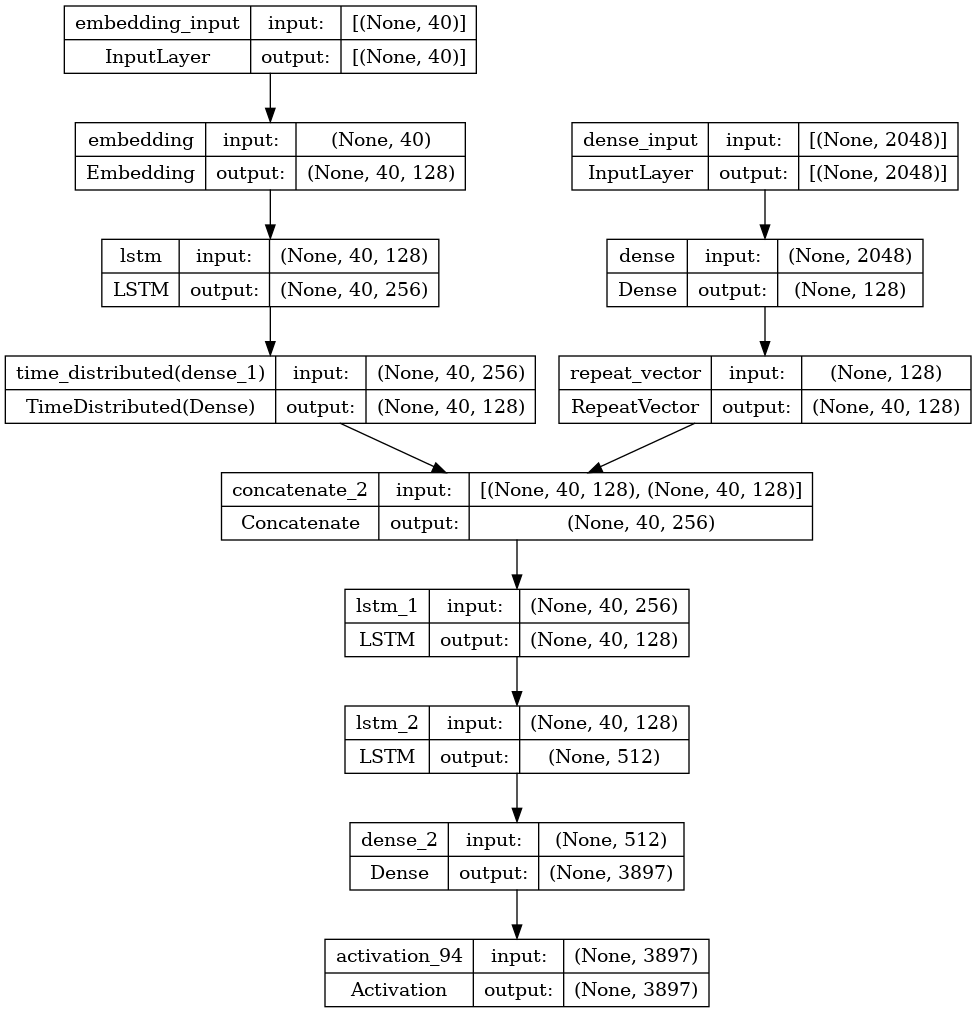

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="./model_plot.png",show_shapes=True,show_layer_names=True)

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model_acc.h5', monitor = 'accuracy' , mode = 'max', verbose = 1 , save_best_only = True)

In [48]:
model.fit([X,y_in],y_out,batch_size=512,epochs=70,callbacks=[mc])

Epoch 1/70
175/175 [==============================] - ETA: 0s - loss: 5.4306 - accuracy: 0.1274
Epoch 1: accuracy improved from -inf to 0.12740, saving model to best_model_acc.h5
175/175 [==============================] - 31s 135ms/step - loss: 5.4306 - accuracy: 0.1274
Epoch 2/70
175/175 [==============================] - ETA: 0s - loss: 5.3312 - accuracy: 0.1324
Epoch 2: accuracy improved from 0.12740 to 0.13240, saving model to best_model_acc.h5
175/175 [==============================] - 14s 79ms/step - loss: 5.3312 - accuracy: 0.1324
Epoch 3/70
175/175 [==============================] - ETA: 0s - loss: 5.3132 - accuracy: 0.1327
Epoch 3: accuracy improved from 0.13240 to 0.13273, saving model to best_model_acc.h5
175/175 [==============================] - 13s 75ms/step - loss: 5.3132 - accuracy: 0.1327
Epoch 4/70
175/175 [==============================] - ETA: 0s - loss: 5.2938 - accuracy: 0.1329
Epoch 4: accuracy improved from 0.13273 to 0.13287, saving model to best_model_acc.h5
1

In [49]:
def getImage(file_path):
    test_img=Image.open(file_path)
    test_img=test_img.resize((224,224))
    #test_img=tf.keras.preprocessing.image.img_to_array(test_img)/255
    test_img=np.expand_dims(test_img,axis=0)
    return test_img

In [50]:
test_feature=modele.predict(getImage(path_img+img_name[0]))

1/1 [==============================] - 0s 25ms/step


In [51]:
test_feature

array([[11.409002 ,  0.       ,  2.6761968, ...,  0.       ,  1.6057236,
         1.2118689]], dtype=float32)

In [52]:
text_inp=["start"]
count=0
caption=" "
while count<25:
    count+=1
    encoded=[]
    for i in text_inp:
        encoded.append(tokenizer.word_docs[i])
    encoded=[encoded]
    encoded=pad_sequences(encoded,padding=pad_type,truncating=trunc_type,maxlen=max_length)
    
    prediction=np.argmax(model.predict([test_feature,encoded]))
    
    sampled_word=tokenizer.index_word[prediction]
    caption=caption+" "+ sampled_word
    if sampled_word=="end":
        break
    text_inp.append(sampled_word)

1/1 [==============================] - 0s 20ms/step


In [53]:
" ".join(text_inp[1:])

'a a a a a a a a a a a a a a a a a a a a a a a a a'

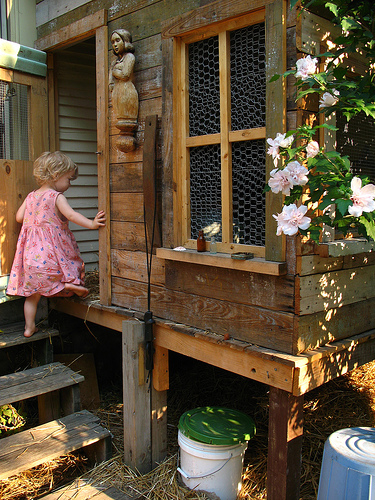

In [54]:
Image.open(path_img+img_name[0])